In [23]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

In [6]:
#Define the absolute path and retrieve the data
sample = urllib.request.urlopen('https://data-mania.com/blog/wp-content/uploads/2018/04/sample.csv')

In [8]:
#Turn the csv to a pandas dataframe then display it.
df = pd.read_csv(sample)
df

,Premium Savings very important,Agent Not Important
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6
...,...,...
145,3,5
146,3,3
147,5,3
148,4,3


In [14]:
#Alternatively
#dataframe = pd.DataFrame(data = sample)
#dataframe.dtypes
#dataframe.head()

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
#Test for null rows and/or missing data points
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Premium Savings very important  150 non-null    int64
 1   Agent Not Important             150 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB


In [17]:
X = df
X = X.values

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
#Elbow Method
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_scaled)
    cluster_errors.append( clusters.inertia_)

In [21]:
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,300.000000
1,2,69.719345
2,3,48.946395
3,4,36.932192
4,5,33.044170
5,6,28.466595
6,7,24.780560
7,8,17.950855
8,9,16.344314


Text(0, 0.5, 'WSS value')

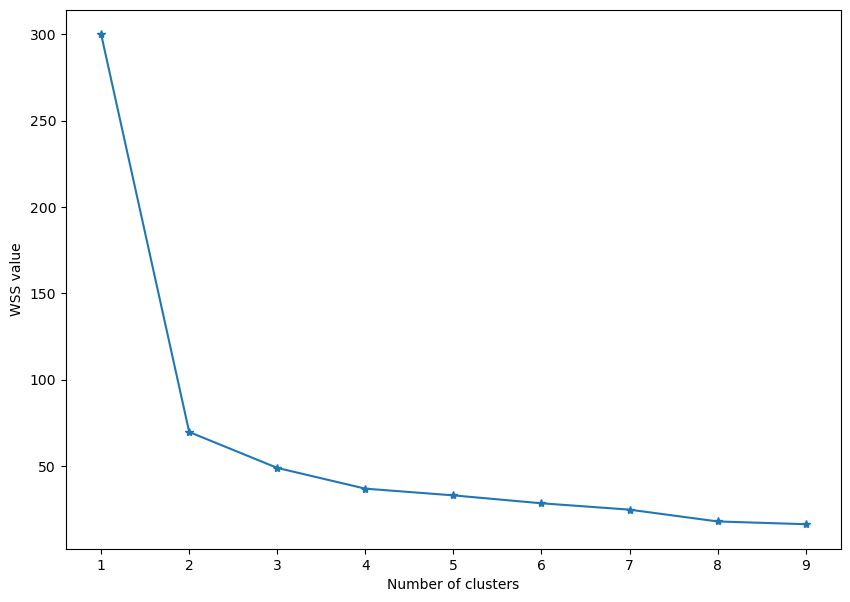

In [28]:
plt.figure(figsize=(10, 7))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = '*')
plt.xlabel('Number of clusters')
plt.ylabel('WSS value')

In [29]:
#KMeans Algorithms
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

In [30]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)